In [ ]:
pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 13.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 

# Load Flickr30k Dataset

In [ ]:
from datasets import load_dataset

# This loads the preprocessed Flickr8k/30k dataset
dataset = load_dataset("nlphuji/flickr30k")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/641 [00:00<?, ?B/s]

flickr30k.py:   0%|          | 0.00/2.51k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/506M [00:00<?, ?B/s]

0001.parquet:   0%|          | 0.00/502M [00:00<?, ?B/s]

0002.parquet:   0%|          | 0.00/506M [00:00<?, ?B/s]

0003.parquet:   0%|          | 0.00/512M [00:00<?, ?B/s]

0004.parquet:   0%|          | 0.00/504M [00:00<?, ?B/s]

0005.parquet:   0%|          | 0.00/495M [00:00<?, ?B/s]

0006.parquet:   0%|          | 0.00/495M [00:00<?, ?B/s]

0007.parquet:   0%|          | 0.00/497M [00:00<?, ?B/s]

0008.parquet:   0%|          | 0.00/289M [00:00<?, ?B/s]

Generating test split:   0%|          | 0/31014 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    test: Dataset({
        features: ['image', 'caption', 'sentids', 'split', 'img_id', 'filename'],
        num_rows: 31014
    })
})

In [ ]:
!pip install transformers datasets torchvision torch accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

# Load Pretrained BLIP for Image Captioning

In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch
from PIL import Image
import requests
from io import BytesIO

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to(device)



Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [ ]:
dataset

DatasetDict({
    test: Dataset({
        features: ['image', 'caption', 'sentids', 'split', 'img_id', 'filename'],
        num_rows: 31014
    })
})

# Evaluate BLIP Before Fine-Tuning

In [ ]:
from PIL import Image

def generate_caption(image: Image.Image):
    inputs = processor(image, return_tensors="pt").to(device)
    out = model.generate(**inputs)
    return processor.decode(out[0], skip_special_tokens=True)

sample = dataset['test'][0]

image = sample["image"].convert("RGB")
caption = sample["caption"]

# Step 3: Run the caption generation
print("Ground Truth:", caption)
print("Prediction Before Fine-Tuning:", generate_caption(image))

Ground Truth: ['Two young guys with shaggy hair look at their hands while hanging out in the yard.', 'Two young, White males are outside near many bushes.', 'Two men in green shirts are standing in a yard.', 'A man in a blue shirt standing in a garden.', 'Two friends enjoy time spent together.']
Prediction Before Fine-Tuning: a man standing in the grass


# Fine-Tune BLIP on Flickr30k

In [ ]:
from torchvision import transforms
from torch.utils.data import DataLoader

## Preprocessing function

In [ ]:
def preprocess(example):
    inputs = processor(
        images=example["image"].convert("RGB"),
        text=example["caption"],
        return_tensors="pt",
        padding="max_length",
        truncation=True,
        max_length=32,
    )

    return {
        "pixel_values": inputs["pixel_values"][0],        # shape [3, H, W]
        "input_ids": inputs["input_ids"][0],              # shape [seq_length]
        "attention_mask": inputs["attention_mask"][0],    # shape [seq_length]
        "labels": inputs["input_ids"][0],                 # same as input_ids
    }


In [ ]:
# dataset = dataset['test']
train_dataset = dataset.select(range(2000)).map(preprocess, remove_columns=dataset.column_names)
train_dataset.set_format(type="torch")


Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)


## Training Loop

In [ ]:
from torch.optim import AdamW

model.train()
optimizer = AdamW(model.parameters(), lr=5e-5)

for epoch in range(4):
    for batch in train_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(
            pixel_values=batch["pixel_values"],
            input_ids=batch["input_ids"],
            attention_mask=batch["attention_mask"],
            labels=batch["labels"]
        )

        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    print(f"Epoch {epoch+1} - Loss: {loss.item():.4f}")



Epoch 1 - Loss: 1.1044
Epoch 2 - Loss: 0.7745
Epoch 3 - Loss: 0.4053
Epoch 4 - Loss: 0.4198


In [ ]:
model.eval()
print("Prediction After Fine-Tuning:", generate_caption(image))


Prediction After Fine-Tuning: two guys one in a teal shirt and the other in a black pants and t - shirt are


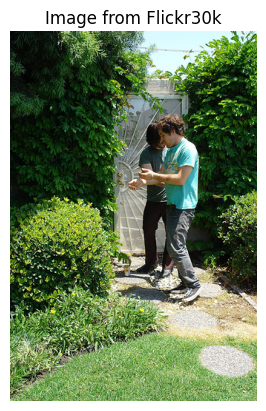

👉 Reference Caption: ['Two young guys with shaggy hair look at their hands while hanging out in the yard.', 'Two young, White males are outside near many bushes.', 'Two men in green shirts are standing in a yard.', 'A man in a blue shirt standing in a garden.', 'Two friends enjoy time spent together.']
🧠 Predicted Caption After Fine-Tuning: a man in a blue shirt and gray jeans is standing in a yard looking at his cellphone.


In [ ]:
import matplotlib.pyplot as plt

def generate_caption(image):
    inputs = processor(image, return_tensors="pt").to(device)
    out = model.generate(**inputs)
    return processor.decode(out[0], skip_special_tokens=True)

# Pick a sample from dataset
sample = dataset[0]
image = sample["image"]
reference = sample["caption"]

# Show image using matplotlib
plt.imshow(image)
plt.axis("off")
plt.title("Image from Flickr30k")
plt.show()

# Generate and print caption
model.eval()
caption = generate_caption(image)
print("👉 Reference Caption:", reference)
print("🧠 Predicted Caption After Fine-Tuning:", caption)


In [ ]:
!pip install evaluate -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.0 MB/s eta 0:00:00


In [ ]:
pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=be43e532892dc698832e5cdd738f20d793bf04f30f0b39a046959efb18eb0b28
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score


In [ ]:
import evaluate

# Load metrics
meteor = evaluate.load("meteor")
rouge = evaluate.load("rouge")


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
bleu = evaluate.load("bleu")

preds = []
refs = []

for sample in dataset.select(range(100)):
    pred = generate_caption(sample["image"].convert("RGB"))
    preds.append(pred)
    refs.append([sample["caption"]])

print("BLEU Score:", bleu.compute(predictions=preds, references=refs))


BLEU Score: {'bleu': 0.014291672770737486, 'precisions': [0.8077830188679245, 0.5551378446115288, 0.4304812834224599, 0.3531518624641834], 'brevity_penalty': 0.027969212050664997, 'length_ratio': 0.21850038649832518, 'translation_length': 1696, 'reference_length': 7762}


In [ ]:
meteor_score = meteor.compute(predictions=preds, references=refs)
rouge_score = rouge.compute(predictions=preds, references=refs)

print("METEOR Score:", meteor_score)
print("ROUGE-L Score:", rouge_score["rougeL"])


METEOR Score: {'meteor': np.float64(0.135383776979754)}
ROUGE-L Score: 0.3075015155292755


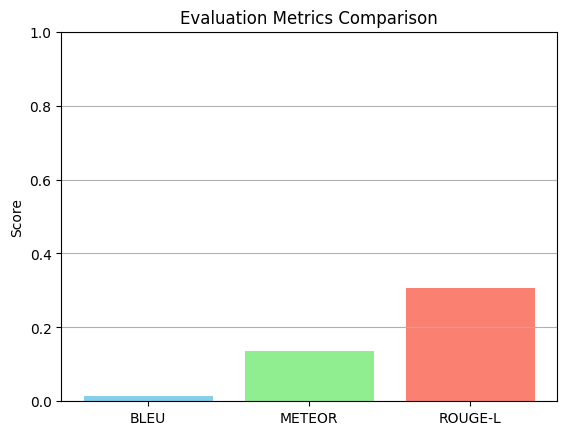

In [ ]:
import matplotlib.pyplot as plt

# Replace with your actual values
metrics = {
    "BLEU": 0.014291672770737486,
    "METEOR": meteor_score["meteor"],
    "ROUGE-L": rouge_score["rougeL"]
}

plt.bar(metrics.keys(), metrics.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Evaluation Metrics Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)  # BLEU is small, you can adjust this to see the bars better
plt.grid(axis='y')
plt.show()


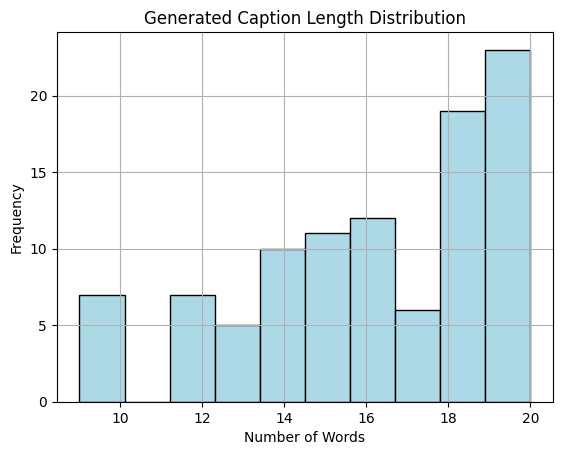

In [ ]:
caption_lengths = [len(pred.split()) for pred in preds]

plt.hist(caption_lengths, bins=10, color='lightblue', edgecolor='black')
plt.title("Generated Caption Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


<ipython-input-31-de7fe1ee6596>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=n_grams, y=precisions, palette="pastel")


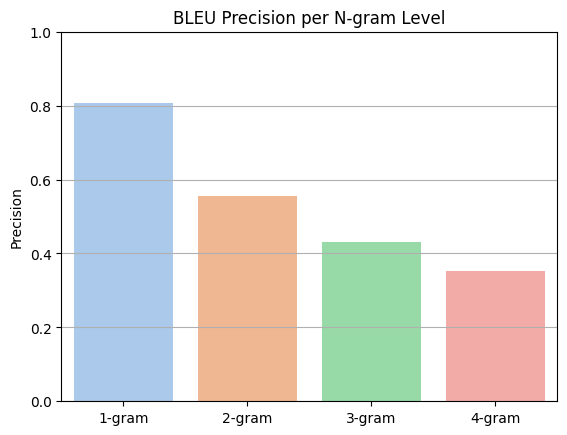

In [ ]:
import seaborn as sns

precisions = [0.8077830188679245, 0.5551378446115288, 0.4304812834224599, 0.3531518624641834]  # Replace with actual if needed
n_grams = ['1-gram', '2-gram', '3-gram', '4-gram']

sns.barplot(x=n_grams, y=precisions, palette="pastel")
plt.title("BLEU Precision per N-gram Level")
plt.ylabel("Precision")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import torch

def compare_captions(image_input, model_base, model_finetuned, processor, device):
    # Load image if path
    if isinstance(image_input, str):
        image = Image.open(image_input).convert("RGB")
    else:
        image = image_input.convert("RGB")

    # Generate caption with base model
    model_base.eval()
    inputs = processor(image, return_tensors="pt").to(device)
    with torch.no_grad():
        out_base = model_base.generate(**inputs)
    caption_base = processor.decode(out_base[0], skip_special_tokens=True)

    # Generate caption with fine-tuned model
    model_finetuned.eval()
    inputs = processor(image, return_tensors="pt").to(device)
    with torch.no_grad():
        out_ft = model_finetuned.generate(**inputs)
    caption_ft = processor.decode(out_ft[0], skip_special_tokens=True)

    # Show image and both captions
    plt.imshow(image)
    plt.axis("off")
    plt.title("Image for Caption Comparison")
    plt.show()

    print("🧠 Caption BEFORE Fine-Tuning:", caption_base)
    print("🎯 Caption AFTER Fine-Tuning:", caption_ft)


In [ ]:
# Load the base pretrained model again (if needed)
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model_base = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to(device)

# Now compare on any image from dataset or your own image file
# compare_captions(dataset[10]["image"], model_base, model, processor, device)

# OR from your own image file



# Once trained

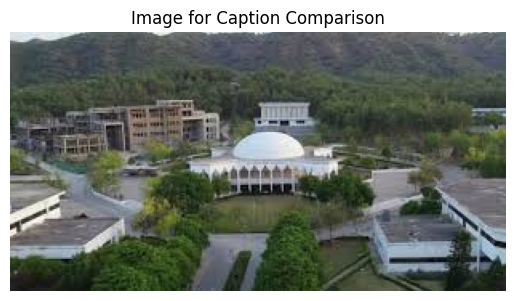

🧠 Caption BEFORE Fine-Tuning: the campus of the university of engineering in bangalore
🎯 Caption AFTER Fine-Tuning: a large white building with a dome stands in a landscape next to a large white building with a dome


In [ ]:
compare_captions("download.jpg", model_base, model, processor, device)

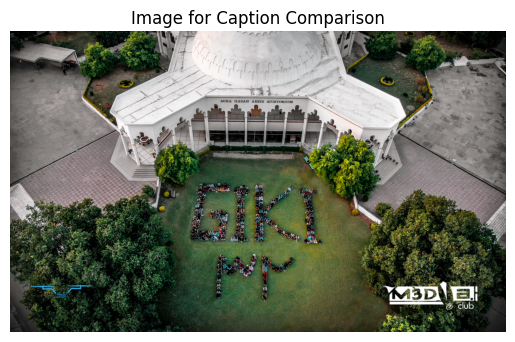

🧠 Caption BEFORE Fine-Tuning: a group of people sitting on a lawn
🎯 Caption AFTER Fine-Tuning: a large group of people is standing outside next to a pond in front of a white building.


In [ ]:
compare_captions("batch.png", model_base, model, processor, device)

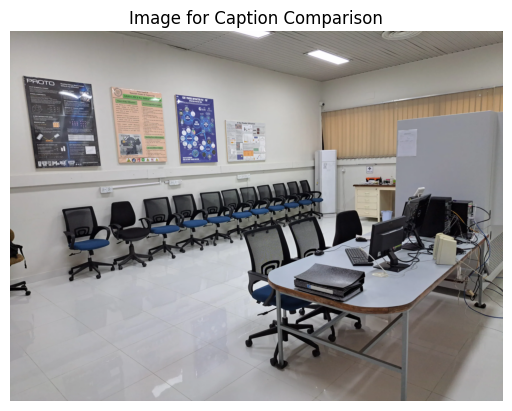

🧠 Caption BEFORE Fine-Tuning: a room with several chairs and a table
🎯 Caption AFTER Fine-Tuning: a conference or training room with a table, chairs, and a board displaying a football game.


In [ ]:
compare_captions("lab.webp", model_base, model, processor, device)

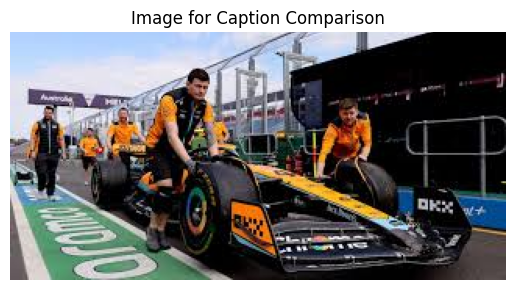

🧠 Caption BEFORE Fine-Tuning: the new formula car for f120
🎯 Caption AFTER Fine-Tuning: a race car marked with the number 4 is driven by a team of men and women.


In [ ]:
compare_captions("f1.jpg", model_base, model, processor, device)

In [ ]:
!pip install huggingface_hub
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: write).
The token `ai-lab` has been saved to /root/.cache/huggingface/stored_tokens
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pu

In [ ]:
from huggingface_hub import HfApi, HfFolder
from transformers import BlipForConditionalGeneration, BlipProcessor

repo_name = "omarkashif/blip-finetuned-flickr30k"
# Upload to HF Hub
model.push_to_hub(repo_name)
processor.push_to_hub(repo_name)


model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/omarkashif/blip-finetuned-flickr30k/commit/32d230d43616ada25b81e22171e0d272a0d7631e', commit_message='Upload processor', commit_description='', oid='32d230d43616ada25b81e22171e0d272a0d7631e', pr_url=None, repo_url=RepoUrl('https://huggingface.co/omarkashif/blip-finetuned-flickr30k', endpoint='https://huggingface.co', repo_type='model', repo_id='omarkashif/blip-finetuned-flickr30k'), pr_revision=None, pr_num=None)

In [ ]:
# Save base (pretrained) model
model_base.save_pretrained("blip_base")
processor.save_pretrained("blip_base")  # same processor

# Save fine-tuned model
model.save_pretrained("blip_finetuned")
processor.save_pretrained("blip_finetuned")  # same processor

[]

In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load models
processor = BlipProcessor.from_pretrained("blip_finetuned")  # same processor for both
model_base = BlipForConditionalGeneration.from_pretrained("blip_base").to(device)
model_finetuned = BlipForConditionalGeneration.from_pretrained("blip_finetuned").to(device)


In [ ]:
def compare_captions(image_input, model_base, model_finetuned, processor, device):
    from PIL import Image
    import matplotlib.pyplot as plt

    # Load image if path
    if isinstance(image_input, str):
        image = Image.open(image_input).convert("RGB")
    else:
        image = image_input.convert("RGB")

    # Generate caption with base model
    model_base.eval()
    inputs = processor(image, return_tensors="pt").to(device)
    with torch.no_grad():
        out_base = model_base.generate(**inputs)
    caption_base = processor.decode(out_base[0], skip_special_tokens=True)

    # Generate caption with fine-tuned model
    model_finetuned.eval()
    inputs = processor(image, return_tensors="pt").to(device)
    with torch.no_grad():
        out_ft = model_finetuned.generate(**inputs)
    caption_ft = processor.decode(out_ft[0], skip_special_tokens=True)

    # Show image and both captions
    plt.imshow(image)
    plt.axis("off")
    plt.title("Image for Caption Comparison")
    plt.show()

    print("🧠 Caption BEFORE Fine-Tuning:", caption_base)
    print("🎯 Caption AFTER Fine-Tuning:", caption_ft)


In [ ]:
# From a dataset sample
# compare_captions(dataset[0]["image"], model_base, model_finetuned, processor, device)

# Or from a local image file
compare_captions("sample_image.jpg", model_base, model_finetuned, processor, device)
